The goal of this project is to build, train, test and deploy machine learning models to predict sentiment from thousands of Amazon Echo customer reviews. Machine Learning based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not without having humans manually review thousands of customer reviews

# IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data 
amazon_df = pd.read_csv('/Users/Ladi/Desktop/amazon_reviews.csv')
amazon_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
amazon_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
amazon_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [6]:
#dropping the date and variation columns 
amazon_df = amazon_df.drop(['date'], axis=1).drop(['variation'], axis=1)
amazon_df

,rating,verified_reviews,feedback
0,5,Love my Echo!,1
1,5,Loved it!,1
2,4,"Sometimes while playing a game, you can answer...",1
3,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,Music,1
...,...,...,...
3145,5,"Perfect for kids, adults and everyone in betwe...",1
3146,5,"Listening to music, searching locations, check...",1
3147,5,"I do love these things, i have them running my...",1
3148,5,Only complaint I have is that the sound qualit...,1


# DATA EXPLORATION 

Let's see the distribution of the 'rating' column

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

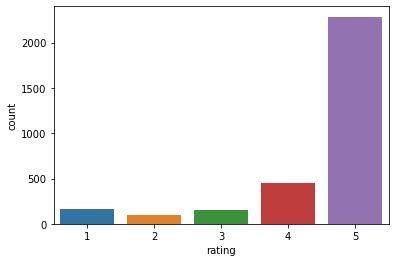

In [8]:
sns.countplot(amazon_df['rating'], label ='count')

Let's see the distribution of the 'feedback' column 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

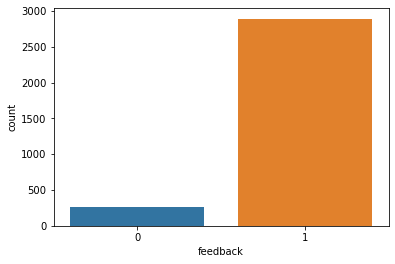

In [9]:
sns.countplot(amazon_df['feedback'], label='count')

Adding a new column 'length' to view the length of each review 

In [10]:
amazon_df['length'] = amazon_df['verified_reviews'].apply(len)
amazon_df

,rating,verified_reviews,feedback,length
0,5,Love my Echo!,1,13
1,5,Loved it!,1,9
2,4,"Sometimes while playing a game, you can answer...",1,195
3,5,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Music,1,5
...,...,...,...,...
3145,5,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,"Listening to music, searching locations, check...",1,135
3147,5,"I do love these things, i have them running my...",1,441
3148,5,Only complaint I have is that the sound qualit...,1,380


Plotting histogram for the 'length' column to view the distribution

<AxesSubplot:>

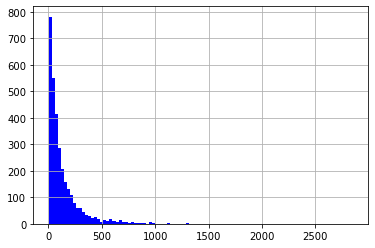

In [16]:
amazon_df['length'].hist(bins=100, color ='blue')

we can see that in general, a lot of customers left really short reviews 

In [17]:
### Let's get the statistical summary again
amazon_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


we can see that the shortest review length was just one word, the average was 132 and the longest was 2851 characters

Let's see the shortest review 

In [21]:
amazon_df[amazon_df['length'] == 1]['verified_reviews'].iloc[0]

'😍'

A number of reviews had just the one character so we use 'iloc[0]' to get the first one  

Let's see the first review with the average number of characters

In [19]:
amazon_df[amazon_df['length'] == 132]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

Let's see the longest review

In [25]:
amazon_df[amazon_df['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

# PLOTTING WORDCLOUDS

First, let's split the 'feedback' column into positive and negative reviews so we can plot separate wordlcouds 

In [36]:
positive_reviews = amazon_df[amazon_df['feedback'] == 1]
postive_reviews

,rating,verified_reviews,feedback,length
0,5,Love my Echo!,1,13
1,5,Loved it!,1,9
2,4,"Sometimes while playing a game, you can answer...",1,195
3,5,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Music,1,5
...,...,...,...,...
3145,5,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,"Listening to music, searching locations, check...",1,135
3147,5,"I do love these things, i have them running my...",1,441
3148,5,Only complaint I have is that the sound qualit...,1,380


In [27]:
negative_reviews = amazon_df[amazon_df['feedback'] == 0]
negative_reviews

,rating,verified_reviews,feedback,length
46,2,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,Sound is terrible if u want good music too get...,0,53
141,1,Not much features.,0,18
162,1,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,Sad joke. Worthless.,0,20
...,...,...,...,...
3047,1,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,The only negative we have on this product is t...,0,240
3091,1,I didn’t order it,0,17


Converting to a list format

In [31]:
reviews = amazon_df['verified_reviews'].tolist()
len(reviews)

3150

 Joining the sentences 

In [32]:
reviews_as_one_string =" ".join(reviews)
reviews_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

Installing wordcloud

In [30]:
!pip install wordcloud

     |████████████████████████████████| 160 kB 388 kB/s eta 0:00:01


First let's plot the general wordcloud

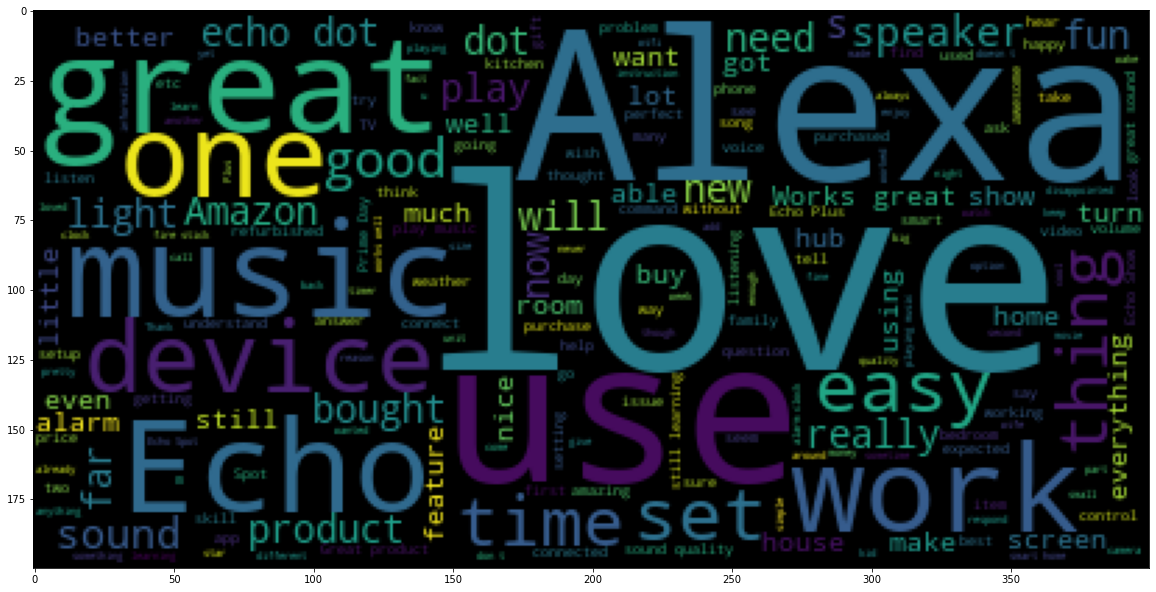

In [33]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(reviews_as_one_string))

Plotting the wordcloud for the positive reviews 

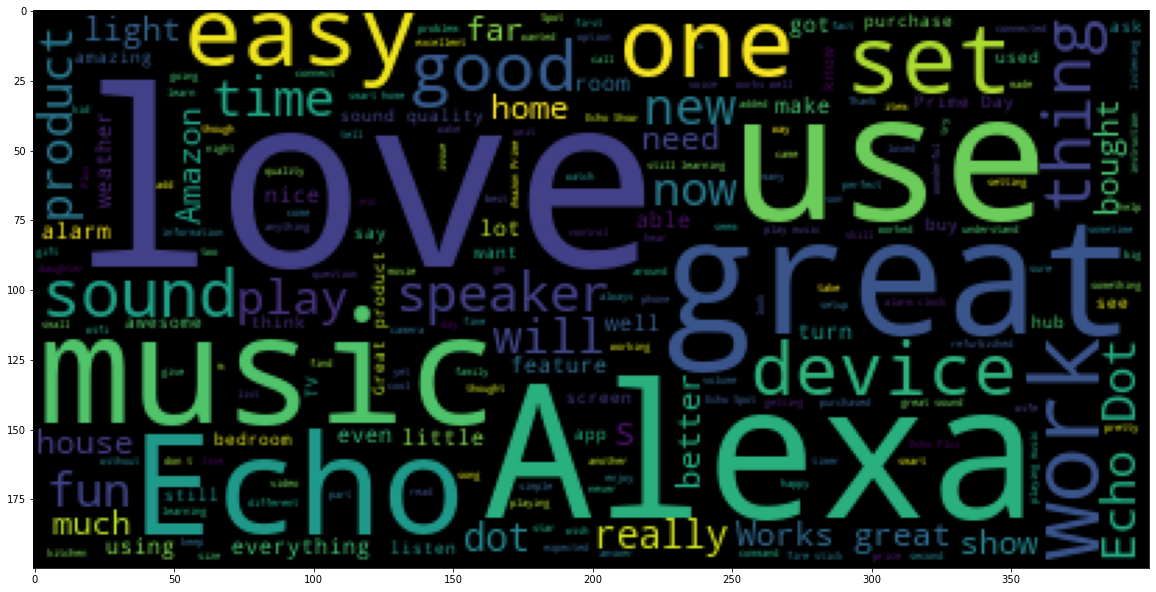

In [37]:
positive_list = positive_reviews['verified_reviews'].tolist()
positive_reviews_as_one_string =" ".join(positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_reviews_as_one_string))

Plotting the wordcloud for the negative reviews 

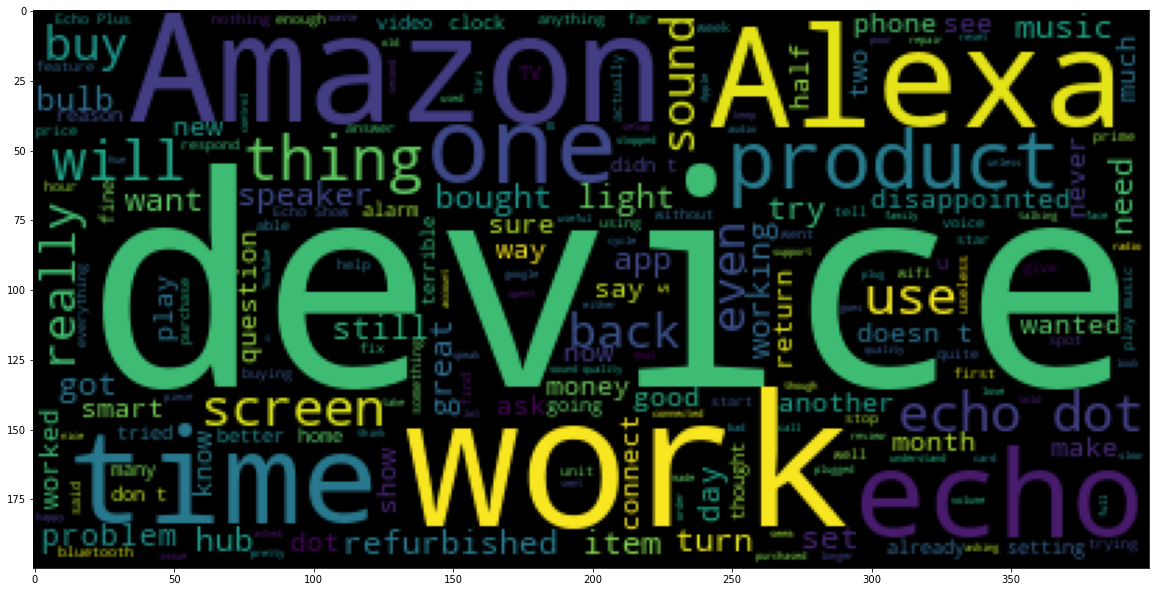

In [38]:
negative_list = negative_reviews['verified_reviews'].tolist() 
negative_reviews_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_reviews_as_one_string))

# DATA CLEANING  - REMOVING PUNCTUATIONS AND STOPWORDS FROM TEXT

Stopwords are the most common words in any language. By removing stopwords and punctuations, we remove low-level information from our text in order to give the important information more focus

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/Ladi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Creating a function to remove stopwords and punctuations from our text

In [43]:
def message_cleaning(message):
    punctuation_removed = [char for char in message if char not in string.punctuation]
    punctuation_removed_join = ''.join(punctuation_removed)
    punctuation_removed_join_clean = [word for word in punctuation_removed_join.split() if word.lower() not in stopwords.words('english')]
    return punctuation_removed_join_clean

Applying the function to the 'verified_reviews' column

In [44]:
amazon_df_clean = amazon_df['verified_reviews'].apply(message_cleaning)

Let's see an example 

In [45]:
print(amazon_df_clean[2])

['Sometimes', 'playing', 'game', 'answer', 'question', 'correctly', 'Alexa', 'says', 'got', 'wrong', 'answers', 'like', 'able', 'turn', 'lights', 'away', 'home']


Let's see the original review 

In [48]:
print(amazon_df['verified_reviews'][2])

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.


# PERFORMING COUNT VECTORIZATION (TOKENIZATION)

This is the process of converting text data into numerical vectors. In order to build any machine learning model, the final level data has to be in numerical form because models don't understand text or image data directly as humans do. 

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
reviews_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])

In [50]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [51]:
print(reviews_countvectorizer.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [53]:
X = pd.DataFrame(reviews_countvectorizer.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y = amazon_df['feedback']

Creating a confusion matrix function that we will use later 

In [56]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 

In [57]:
X.shape

(3150, 5211)

In [58]:
y.shape

(3150,)

# TRAIN AND TEST ML MODELS

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### NAIVE BAYES

In [60]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [61]:
from sklearn.metrics import classification_report

Plot confusion matrix

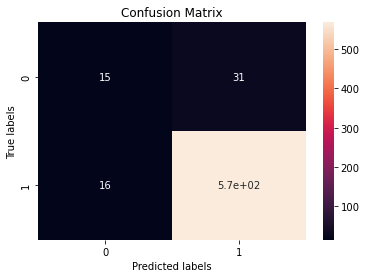

In [63]:
yhat_NB = NB_classifier.predict(X_test)
plot_confusion_matrix(y_test,yhat_NB)

In [64]:
print(classification_report(y_test, yhat_NB))

              precision    recall  f1-score   support

           0       0.48      0.33      0.39        46
           1       0.95      0.97      0.96       584

    accuracy                           0.93       630
   macro avg       0.72      0.65      0.67       630
weighted avg       0.91      0.93      0.92       630



### LOGISTIC REGRESSION

In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

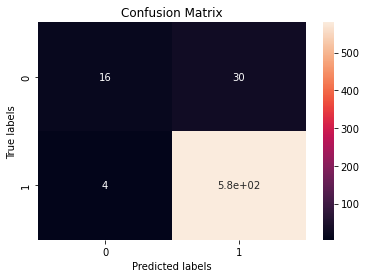

In [73]:
yhat_logreg = logreg.predict(X_test)
plot_confusion_matrix(y_test, yhat_logreg)

In [72]:
print(classification_report(y_test, yhat_logreg))

              precision    recall  f1-score   support

           0       0.80      0.35      0.48        46
           1       0.95      0.99      0.97       584

    accuracy                           0.95       630
   macro avg       0.88      0.67      0.73       630
weighted avg       0.94      0.95      0.94       630



### GRADIENT BOOSTING

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

Gradient_boosting = GradientBoostingClassifier()
Gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier()

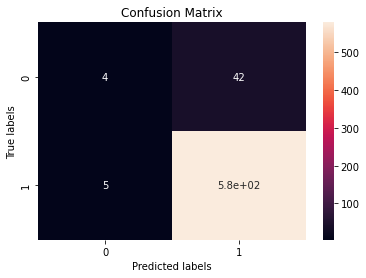

In [75]:
yhat_Gradient_boosting = Gradient_boosting.predict(X_test)
plot_confusion_matrix(y_test, yhat_Gradient_boosting)

In [74]:
print(classification_report(y_test, yhat_Gradient_boosting))

              precision    recall  f1-score   support

           0       0.44      0.09      0.15        46
           1       0.93      0.99      0.96       584

    accuracy                           0.93       630
   macro avg       0.69      0.54      0.55       630
weighted avg       0.90      0.93      0.90       630

